<a href="https://colab.research.google.com/github/grams3003/ML-4430/blob/main/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


knn score:
[0 0 0 ... 0 2 0]
0.7125901791947871
svn score:
[0 0 0 ... 0 2 0]
0.7093320921573191
mlp score:
[0 0 0 ... 0 2 0]
0.7042122410984408


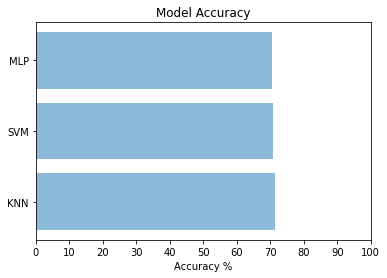

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

#open the txt files
german_file = open('german.txt')
english_file = open('english.txt')
french_file = open('french.txt')

#read the files
german_lines = german_file.readlines()
english_lines = english_file.readlines()
french_lines = french_file.readlines()

#create testing and training data
training = []
target = []

for word in english_lines:
    cleaned_word = word.replace('\n', '')
    if len(cleaned_word) == 5:
        string_to_ord = []
        for char in cleaned_word:
            string_to_ord.append(ord(char))     
        training.append(string_to_ord) 
        target.append(0)
        
for word in german_lines:
    cleaned_word = word.replace('\n', '')
    if len(cleaned_word) == 5:
        string_to_ord = []   
        for char in cleaned_word:
            string_to_ord.append(ord(char))       
        training.append(string_to_ord)   
        target.append(1)
        
for word in french_lines:
    cleaned_word = word.replace('\n', '')
    if len(cleaned_word) == 5:
        string_to_ord = []     
        for char in cleaned_word:
            string_to_ord.append(ord(char))    
        training.append(string_to_ord)   
        target.append(2)
 

#split the data to fit the models

X = training
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)

#knn model
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(X_train, y_train)
print('knn score:')
print(knn.predict(X_test))
knn_score = knn.score(X_test, y_test)
print(knn_score)

#svm model
svm = svm.SVC()
svm.fit(X_train, y_train)
print('svn score:')
print(svm.predict(X_test))
svm_score = svm.score(X_test, y_test)
print(svm_score)

#mlp model
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
print('mlp score:')
print(mlp.predict(X_test))
mlp_score = mlp.score(X_test, y_test)
print(mlp_score)

#plot accuracy
labels = ['KNN', 'SVM', 'MLP']
plt.title('Model Accuracy')
plt.xlabel('Accuracy %')
value = [knn_score * 100, svm_score * 100, mlp_score * 100]
y_pos = np.arange(len(labels))
plt.barh(y_pos, value, align = 'center', alpha = .5)
plt.yticks(y_pos, labels)
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.savefig('accuracy.png')
plt.show()